In [69]:
import ugradio
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

def scaleToReal(analog_values, volt_range=[-1, 1]):
    type_info = np.iinfo(np.int16)

    x1 = volt_range[0]
    x2 = volt_range[1]

    a1 = type_info.min
    a2 = type_info.max

    real_values = []
    real2_values = []
    for i in analog_values:
        real_values.append(float(x2 - x1) * float(i - a1) / float(a2 - a1) + x1)
    return np.asarray(real_values)

def plotPower(filename, xlabel="Frequency (MHz)", ylabel="Power (V$\cdot$s)", N=1, max_volt=.1):
    v_samp = 62.5/N
    arr = np.load(filename)
    print arr
    #arr = scaleToReal(arr, [-.1, .1])
    dual_real = arr[len(arr)/2:]
    dual_imag = arr[:len(arr)/2]
    complex_arr = dual_real + np.multiply(1j, dual_imag)
    FT = np.fft.fft(complex_arr)
    freqs = np.fft.fftfreq(len(FT), 1/v_samp)
    power = np.abs(FT)**2
    #freqs, FT = ugradio.dft.dft(complex_arr[:4096], vsamp=4)
    #power = np.abs(FT)**2
    pl.plot(freqs, power)
    pl.xlabel(xlabel, fontsize=14)
    pl.ylabel(ylabel, fontsize=14)
    pl.xlim(-2, 2)

(array([  2.00000000e+00,   6.00000000e+00,   1.00000000e+01,
          4.60000000e+01,   1.25000000e+02,   2.50000000e+02,
          8.26000000e+02,   2.52900000e+03,   1.12790000e+04,
          2.32220000e+04,   4.80280000e+04,   9.03350000e+04,
          1.47062000e+05,   2.84863000e+05,   2.50466000e+05,
          2.43110000e+05,   3.65804000e+05,   6.85990000e+04,
          3.58110000e+04,   1.68050000e+04,   6.98000000e+03,
          2.92300000e+03,   5.93000000e+02,   2.03000000e+02,
          6.40000000e+01,   3.50000000e+01,   1.90000000e+01,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([-3584., -3312., -3040., -2768., -2496., -2224., -1952., -1680.,
        -1408., -1136.,  -864.,  -592.,  -320.,   -48.,   224.,   496.,
          768.,  1040.,  1312.,  1584.,  1856.,  2128.,  2400.,  2672.,
         2944.,  3216.,  3488.,  3760.,  4032.,  4304.,  4576.,  4848.,
         5120.]),
 <a list of 32 Patch objects

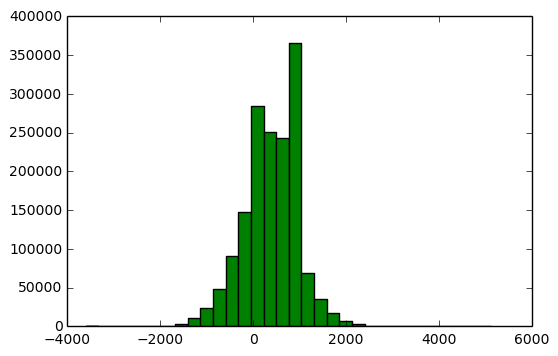

In [64]:

filename2 = "50_block_50mV.npy"
arr = np.load(filename2)
pl.hist(arr, bins = 64., color = "green", normed=False)


[-1792  -768 -1024 ...,   768     0     0]


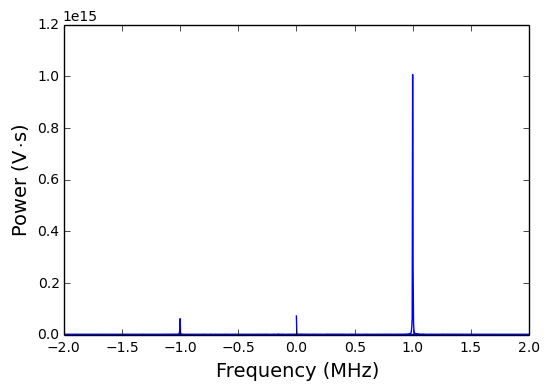

In [70]:
file1 = "usb_1421MHz_50mV_30dBm.npy"
plotPower(file1)


In [39]:
ugradio.timing.lst()

1.6406020865734643